In [1]:
import pandas as pd
import quantstats as qs
import pandas_montecarlo
import yfinance as yf

qs.extend_pandas()

## Organización de data

In [2]:
sample = 'Registro_de_operaciones_RoboforexMT5_Octubre2022.xlsx'

In [3]:
df = pd.read_excel(sample, index_col=0)
df

,Type,Direction,Commission,Swap,GrossProfit,Profit,Balance
datetime,,,,,,,
2022-10-03 01:03:00,sell 0.03 EURUSD,buy,-0.06,0.0,0.00,-0.06,24999.94
2022-10-03 02:57:11,buy 0.03 EURUSD,out,-0.06,0.0,2.79,2.73,25002.67
2022-10-03 04:01:02,sell 0.03 EURUSD,buy,-0.06,0.0,0.00,-0.06,25002.61
2022-10-03 04:52:12,sell 0.04 EURUSD,buy,-0.08,0.0,0.00,-0.08,25002.53
2022-10-03 06:04:30,buy 0.03 EURUSD,out,-0.06,0.0,-0.48,-0.54,25001.99
...,...,...,...,...,...,...,...
2022-10-31 13:04:00,sell 0.05 EURUSD,buy,-0.10,0.0,0.00,-0.10,26290.22
2022-10-31 13:33:20,buy 0.05 EURUSD,out,-0.10,0.0,4.75,4.65,26294.87
2022-10-31 16:16:03,sell 0.05 EURUSD,buy,-0.10,0.0,0.00,-0.10,26294.77


In [4]:
df['pct_bal'] = df['Balance'].pct_change()

In [5]:
df.reset_index(inplace=True)

In [6]:
df

,datetime,Type,Direction,Commission,Swap,GrossProfit,Profit,Balance,pct_bal
0,2022-10-03 01:03:00,sell 0.03 EURUSD,buy,-0.06,0.0,0.00,-0.06,24999.94,NaN
1,2022-10-03 02:57:11,buy 0.03 EURUSD,out,-0.06,0.0,2.79,2.73,25002.67,0.000109
2,2022-10-03 04:01:02,sell 0.03 EURUSD,buy,-0.06,0.0,0.00,-0.06,25002.61,-0.000002
3,2022-10-03 04:52:12,sell 0.04 EURUSD,buy,-0.08,0.0,0.00,-0.08,25002.53,-0.000003
4,2022-10-03 06:04:30,buy 0.03 EURUSD,out,-0.06,0.0,-0.48,-0.54,25001.99,-0.000022
...,...,...,...,...,...,...,...,...,...
458,2022-10-31 13:04:00,sell 0.05 EURUSD,buy,-0.10,0.0,0.00,-0.10,26290.22,-0.000004
459,2022-10-31 13:33:20,buy 0.05 EURUSD,out,-0.10,0.0,4.75,4.65,26294.87,0.000177
460,2022-10-31 16:16:03,sell 0.05 EURUSD,buy,-0.10,0.0,0.00,-0.10,26294.77,-0.000004
461,2022-10-31 16:33:41,buy 0.05 EURUSD,out,-0.10,0.0,5.10,5.00,26299.77,0.000190


In [7]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
df.set_index('datetime', inplace=True)

In [8]:
returns = df['pct_bal']

In [9]:
returns

datetime
2022-10-03 01:03:00         NaN
2022-10-03 02:57:11    0.000109
2022-10-03 04:01:02   -0.000002
2022-10-03 04:52:12   -0.000003
2022-10-03 06:04:30   -0.000022
                         ...   
2022-10-31 13:04:00   -0.000004
2022-10-31 13:33:20    0.000177
2022-10-31 16:16:03   -0.000004
2022-10-31 16:33:41    0.000190
2022-10-31 19:56:28   -0.000004
Name: pct_bal, Length: 463, dtype: float64

In [10]:
resampled = returns.resample('D').sum()
resampled

datetime
2022-10-03    0.002073
2022-10-04    0.003913
2022-10-05    0.001376
2022-10-06    0.001872
2022-10-07    0.000806
2022-10-08    0.000000
2022-10-09    0.000000
2022-10-10    0.002290
2022-10-11    0.001629
2022-10-12    0.002721
2022-10-13    0.000160
2022-10-14    0.001951
2022-10-15    0.000000
2022-10-16    0.000000
2022-10-17    0.001124
2022-10-18    0.005152
2022-10-19    0.001386
2022-10-20    0.001903
2022-10-21    0.002056
2022-10-22    0.000000
2022-10-23    0.000000
2022-10-24    0.003163
2022-10-25    0.002584
2022-10-26    0.010327
2022-10-27    0.001072
2022-10-28    0.002011
2022-10-29    0.000000
2022-10-30    0.000000
2022-10-31    0.001305
Freq: D, Name: pct_bal, dtype: float64

## Aplico con columna Balance

In [11]:
qs.reports.html(resampled, 'EURUSD=X', output='Recolección de datos/Noviembre2022/DA_vs_EURUSD.html', title='DA_vs_EURUSD')

/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/home/samueltg92/miniconda3/envs/TRADING/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


## Montecarlo

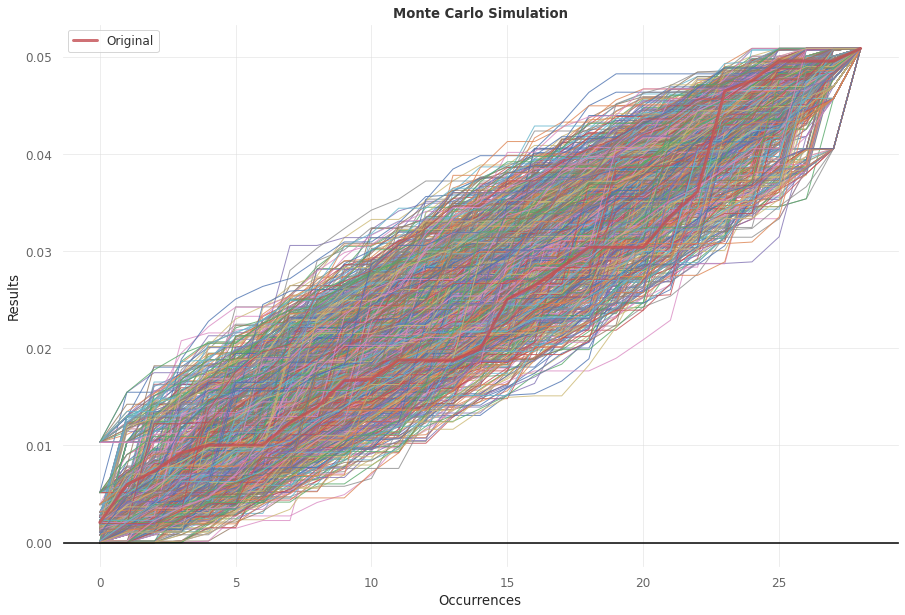

{'min': 0.050875869576124555,
 'max': 0.050875869576124555,
 'mean': 0.05087586957612445,
 'median': 0.050875869576124555,
 'std': 1.0413548932672049e-16,
 'maxdd': nan,
 'bust': 0.0,
 'goal': 0.0}

In [12]:
mc = resampled.montecarlo(sims = 1000, bust = -0.08, goal = 1)
mc.plot(title = 'Monte Carlo Simulation', figsize = (15,10))
mc.stats